In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
from prophet import Prophet



# model_vac = load_model("models\multivariate_vac.keras")
# model.save('models/multivariate_unvac.keras')


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler


In [53]:
df = pd.read_csv("Datasets/covid19postvaxstatewidestats.csv")

df = df[df['unvaccinated_cases_per_100k'].notna()]

df = df.reset_index(drop=True)

In [38]:
#model = load_model("models\Automatic_Tuner.keras")

In [39]:
m#odel.compile(optimizer= Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

#history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2, callbacks = [stop_early])

NameError: name 'm' is not defined

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("datasets/covid19postvaxstatewidestats.csv")

# Rename your actual date and value columns
df = df.rename(columns={'date': 'ds', 'unvaccinated_cases_per_100k': 'y'})  # Replace with real column names

# Ensure the 'ds' column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Perform 80/20 split
split_index = int(len(df) * 0.8)
train_data = df[:split_index]  # 80% for training
test_data = df[split_index:]   # 20% for testing

# Train the Prophet model on training data
model = Prophet()
model.fit(train_data)

# Predict future values (for the length of the test set)
future_dates = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future_dates)

# Get actual test values (y_true) and predicted values (y_pred)
y_true = test_data['y'].values  # Actual values
y_pred = forecast['yhat'].iloc[-len(test_data):].values  # Predicted values

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

00:38:41 - cmdstanpy - INFO - Chain [1] start processing
00:38:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 41.89081269862193


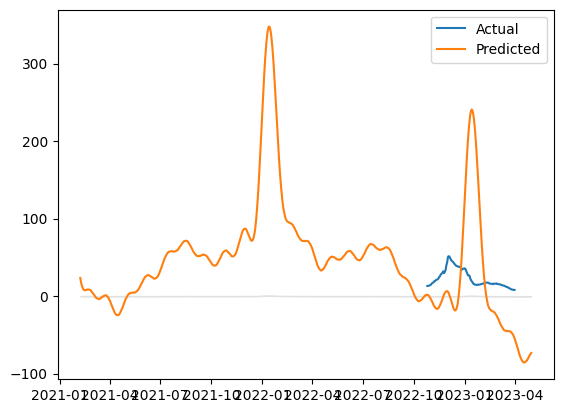

In [50]:
plt.plot(test_data['ds'], test_data['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.show()

In [47]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=0.1)

# Add holidays if applicable
model.add_country_holidays(country_name='US')  # Example for US holidays

# Fit the model and predict
model.fit(df)
forecast = model.predict(future_dates)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual', color='blue')  # Actual data
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')  # Predicted data
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)  # Uncertainty intervals
plt.legend()
plt.show()


Exception: Country holidays must be added prior to model fitting.

01:02:13 - cmdstanpy - INFO - Chain [1] start processing
01:02:13 - cmdstanpy - INFO - Chain [1] done processing


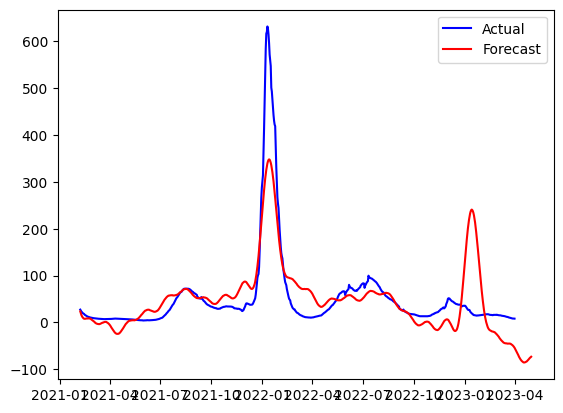

In [52]:
# Load your data
df = pd.read_csv("datasets/covid19postvaxstatewidestats.csv")

# Convert the 'date' column to datetime format (if necessary)
df['date'] = pd.to_datetime(df['date'])  # Using the correct column name 'date'

# Scaling the target column (unvaccinated_cases_per_100k)
scaler = MinMaxScaler()
df['unvaccinated_cases_per_100k_scaled'] = scaler.fit_transform(df[['unvaccinated_cases_per_100k']])

# Rename columns for Prophet
df_scaled = df.rename(columns={'date': 'ds', 'unvaccinated_cases_per_100k_scaled': 'y'})

# Fit Prophet model on scaled data
model1 = Prophet()
model1.fit(df_scaled)

# Make future predictions
future_dates = model1.make_future_dataframe(periods=30)
forecast = model1.predict(future_dates)

# Inverse transform the forecasted results back to original scale
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])

# Plot the original and forecasted values
plt.plot(df['date'], df['unvaccinated_cases_per_100k'], 'b-', label='Actual')  # Using 'date' here
plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast')  # Forecasted data
plt.legend()
plt.show()

In [62]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your Keras model
model = load_model("models/Automatic_Tuner.keras")

# Load and preprocess the data
df = pd.read_csv("datasets/covid19postvaxstatewidestats.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Scale the 3 features (unvaccinated_cases_per_100k, unvaccinated_hosp_per_100k, unvaccinated_deaths_per_100k)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['unvaccinated_cases_per_100k', 
                                           'unvaccinated_hosp_per_100k', 
                                           'unvaccinated_deaths_per_100k']])

df[['unvaccinated_cases_per_100k_scaled', 'unvaccinated_hosp_per_100k_scaled', 'unvaccinated_deaths_per_100k_scaled']] = scaled_features

# Prepare sequences for Keras
sequence_length = 10  # Adjust this to match your model's training sequence length

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Combine the 3 features into a single array
scaled_data = df[['unvaccinated_cases_per_100k_scaled', 
                  'unvaccinated_hosp_per_100k_scaled', 
                  'unvaccinated_deaths_per_100k_scaled']].values

# Create sequences from the combined data (3 features)
X, y = create_sequences(scaled_data, sequence_length)

# Make future predictions (30 steps ahead)
# Get the last sequence for prediction
last_sequence = scaled_data[-sequence_length:]

# Reshape last_sequence to match the model's expected input (1, 10, 3)
current_sequence = last_sequence.reshape(1, sequence_length, 3)

# Predict future values iteratively
future_predictions = []

for _ in range(30):  # Predict 30 steps ahead
    next_value = model.predict(current_sequence)
    
    # Reshape next_value to ensure it has the correct shape (1, 3)
    next_value = next_value.reshape(1, 3)
    
    future_predictions.append(next_value[0])  # Append the predicted value
    
    # Shift the current sequence (drop the oldest step) and append the new predicted value
    current_sequence = np.append(current_sequence[:, 1:, :], next_value.reshape(1, 1, 3), axis=1)

# Inverse transform the predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions))

# Create future dates for plotting
last_date = df['date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=31, closed='right')  # 30 future days

# Plot the original and forecasted values for one of the features (e.g., unvaccinated_cases_per_100k)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['unvaccinated_cases_per_100k'], label='Actual')
plt.plot(future_dates, future_predictions[:, 0], label='Forecast (unvaccinated_cases_per_100k)', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Unvaccinated Cases per 100k')
plt.title('Keras Model Forecast vs Actual')
plt.xticks(rotation=45)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'